# Time Measure

## Code description

I've made python model (ex6_model.py), which is almost completly copied from c++ file (model.exe, taken from wk4 without any changes).  

Using `json` and `subprocess` these files have been remotely called. Execution time has been measured using `time`.

`time_measure(st, model)`  is a function that creates and safes configuration json file with income parameters and after marks the execution time.

This function is used to automatically mark the time and get bigger data that is presented in the pictures.

## Visualizing result

* Fig.1 shows time step dependence divided in Euler, Heun and Runge-Kutte channels.
* Fig.2 shows averaged result (standart and log scales).
* Fig.3 shows py/c++ ratio (standart and log scales).

## Conclusion

As it was expected python distinctly works longer than c++, but during counting step decreasing (therefore number of steps increasing) py/c++ ratio becomes smaller. This ratio step dependence tells us that big part of time lag is caused by initial compilation (mostly libs' loading).

Using this fact py model can be accelerated by convertation into jupiter format and taking initial compilation only once and then calling only main part of code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import subprocess
import time
cmd_cpp = 'model.exe'
cmd_py = 'py ex6_model.py'

In [2]:
def time_measure(st, model):
    config = { 'entries' : [{
        'model' : model,
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : 10,
        'step of modeling' : st,
        'file name' : 'data/'+model+'_'+
        str(int(2))+'_'+
        str(int(6400000))+'_'+
        str(int(0))+'_'+
        str(int(10))+'_'+
        str(round(st,6))+'.txt'}]}
    write = open('config_file.json', 'w')
    json.dump(config, write, indent=4)
    write.close()

    start_cpp = time.time()
    returned_output = subprocess.check_output(cmd_cpp)
    end_cpp = time.time()
    print(str(round(st,6))+'\t'+model+'\tcpp')
    start_py = time.time()
    returned_output = subprocess.check_output(cmd_py)
    end_py = time.time()
    print(str(round(st,6))+'\t'+model+'\tpy')
    return end_cpp - start_cpp, end_py - start_py


In [ ]:
steps = np.linspace(0.000001, 0.01, 500)
time_cpp_e = np.zeros(len(steps))
time_py_e = np.zeros(len(steps))
time_cpp_h = np.zeros(len(steps))
time_py_h = np.zeros(len(steps))
time_cpp_rk = np.zeros(len(steps))
time_py_rk = np.zeros(len(steps))

for i in range(len(steps)):
    time_cpp_e[i], time_py_e[i] = time_measure(steps[i], 'Euler')
    time_cpp_h[i], time_py_h[i] = time_measure(steps[i], 'Heun')
    time_cpp_rk[i], time_py_rk[i] = time_measure(steps[i], 'RK45')

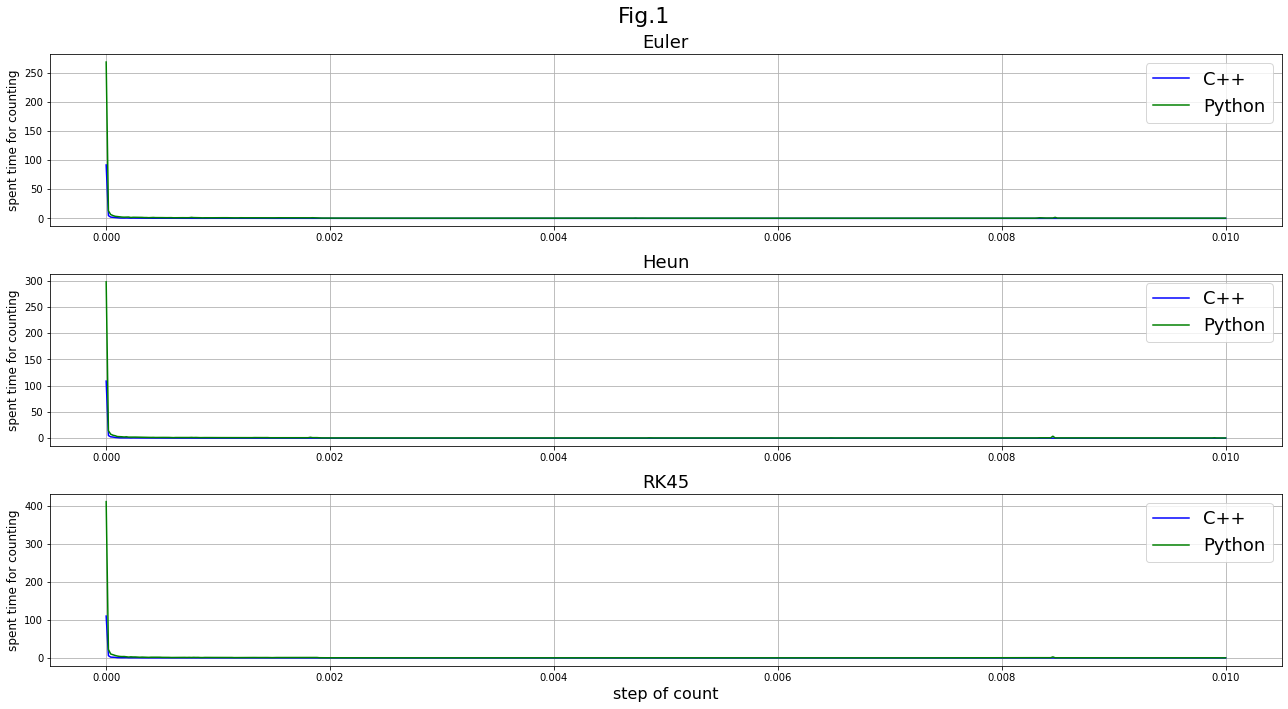

In [22]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(18, 10)
fig.suptitle('Fig.1', fontsize=22)

ax[0].plot(steps, time_cpp_e, c='blue', label='C++')
ax[0].plot(steps, time_py_e, c='green', label='Python')
ax[1].plot(steps, time_cpp_h, c='blue', label='C++')
ax[1].plot(steps, time_py_h, c='green', label='Python')
ax[2].plot(steps, time_cpp_rk, c='blue', label='C++')
ax[2].plot(steps, time_py_rk, c='green', label='Python')

ax[0].set_title('Euler', fontsize=18)
ax[1].set_title('Heun', fontsize=18)
ax[2].set_title('RK45', fontsize=18)

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

ax[2].set_xlabel('step of count', fontsize=16)
ax[0].set_ylabel('spent time for counting', fontsize=12)
ax[1].set_ylabel('spent time for counting', fontsize=12)
ax[2].set_ylabel('spent time for counting', fontsize=12)

ax[0].legend(loc='best', fontsize=18)
ax[1].legend(loc='best', fontsize=18)
ax[2].legend(loc='best', fontsize=18)

plt.tight_layout()
plt.show()

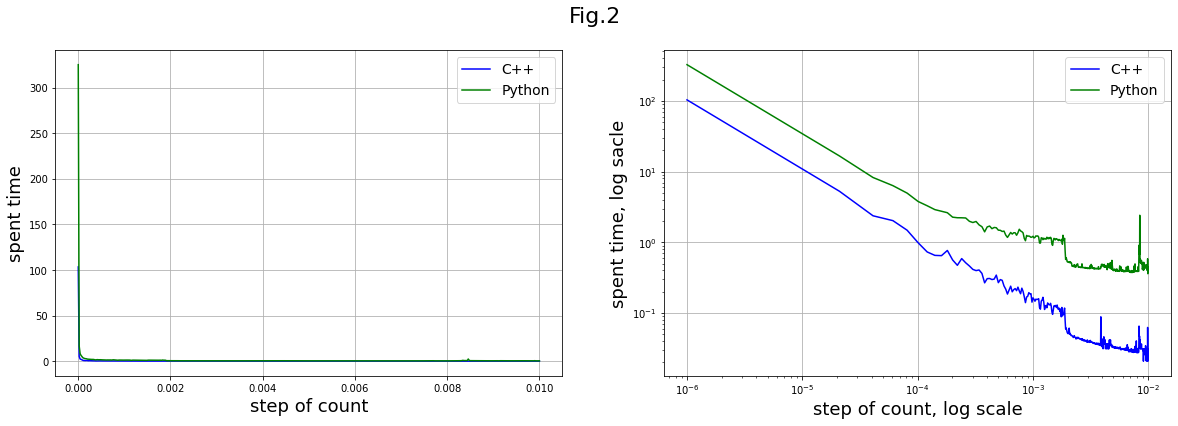

In [24]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,6)
fig.suptitle('Fig.2', fontsize=22)

ax[0].plot(steps, (time_cpp_e+time_cpp_h+time_cpp_rk)/3, c='blue', label='C++')
ax[0].plot(steps, (time_py_e+time_py_h+time_py_rk)/3, c='green', label='Python')
ax[1].plot(steps, (time_cpp_e+time_cpp_h+time_cpp_rk)/3, c='blue', label='C++')
ax[1].plot(steps, (time_py_e+time_py_h+time_py_rk)/3, c='green', label='Python')


ax[0].grid(True)
ax[0].set_xlabel('step of count', fontsize=18)
ax[0].set_ylabel('spent time', fontsize=18)
ax[0].legend(loc='best', fontsize=14)

ax[1].grid(True)
ax[1].set_xlabel('step of count, log scale', fontsize=18)
ax[1].set_ylabel('spent time, log sacle', fontsize=18)
ax[1].legend(loc='best', fontsize=14)

ax[1].set_yscale('log')
ax[1].set_xscale('log')

plt.show()

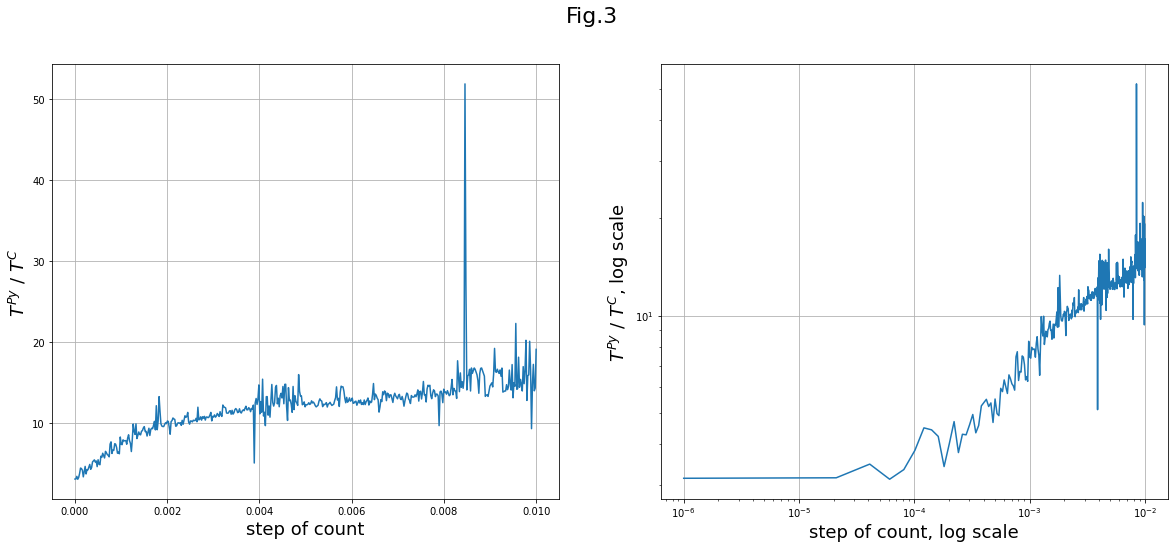

In [27]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
fig.suptitle('Fig.3', fontsize=22)

ax[0].plot(steps, (time_py_e+time_py_h+time_py_rk) / (time_cpp_e+time_cpp_h+time_cpp_rk))
ax[1].plot(steps, (time_py_e+time_py_h+time_py_rk) / (time_cpp_e+time_cpp_h+time_cpp_rk))

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylabel('$T^{Py} ~/~ T^{C}$', fontsize=18)
ax[0].set_xlabel('step of count', fontsize=18)
ax[1].set_ylabel('$T^{Py} ~/~ T^{C}$, log scale', fontsize=18)
ax[1].set_xlabel('step of count, log scale', fontsize=18)

ax[1].set_yscale('log')
ax[1].set_xscale('log')

plt.show()